In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functions import data_cleaning as dc 
df = pd.read_csv('datasets/backloggd_games.csv', index_col= 0)
ranked_df = pd.read_csv('datasets/vgsales.csv')

### Backloggd Info
**Title, Release Date, Genres, Rating, Developers should be kept.** <br>
**Rating has missing** values <br>
**60,000** games 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         60000 non-null  object 
 1   Release_Date  60000 non-null  object 
 2   Developers    60000 non-null  object 
 3   Summary       55046 non-null  object 
 4   Platforms     60000 non-null  object 
 5   Genres        60000 non-null  object 
 6   Rating        25405 non-null  float64
 7   Plays         60000 non-null  object 
 8   Playing       60000 non-null  object 
 9   Backlogs      60000 non-null  object 
 10  Wishlist      60000 non-null  object 
 11  Lists         60000 non-null  object 
 12  Reviews       60000 non-null  object 
dtypes: float64(1), object(12)
memory usage: 6.4+ MB


### Vgames Info
Name, Global Sale, and Publisher should be kept <br>
16598 games listed. <br>
A couple of missing values in some columns

In [3]:
ranked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Remove unecessary columns and rows for this analysis 
Data corresponding with users willingness to play or will play is not used for this project. Finite information such as number of users played and ratings are used instead. <br>
**TBD** for the release will be removed since they are not out yet to be looked at. 

In [4]:
df.columns

### Solution: Drop the columns not needed via Pandas
df.drop(['Wishlist', 'Backlogs','Playing', 'Lists', 'Summary'], axis = 1, inplace= True)
### Solution: Drop all the release date categories as TBD
df.drop(df[df['Release_Date'] == 'TBD'].index, inplace= True)

df.Release_Date = df.Release_Date.apply(lambda x: int(x[-4:]))

df.drop(df[df.Release_Date > 2023].index, inplace= True)
df.drop(df[df.Release_Date < 1990].index, inplace= True)
df.drop(df[df.Rating.isna()].index, inplace= True)


### Looking for dups based off different cases. 
1. Actual Dups
2. Verison Differences
3. Remakes/Rereleases

In [5]:
print('Number of true duplicates before: {}'.format(len(df[df.duplicated()])))

### Solution: drop duplicates via Pandas
df.drop_duplicates(inplace= True)   

print('Number of true duplicates after: {}'.format(len(df[df.duplicated()])))

Number of true duplicates before: 4771
Number of true duplicates after: 0


### Format the data types to make it eaiers to compare and look
1. Convert the K in Plays
2. Convert the K in Reviews

In [6]:
df.info()

### Solution: Apply function to convert the K in the columns 
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000
    return 0.0
    
df['Plays'] = df['Plays'].apply(value_to_float)
df['Reviews'] = df['Reviews'].apply(value_to_float)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19041 entries, 0 to 59996
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         19041 non-null  object 
 1   Release_Date  19041 non-null  int64  
 2   Developers    19041 non-null  object 
 3   Platforms     19041 non-null  object 
 4   Genres        19041 non-null  object 
 5   Rating        19041 non-null  float64
 6   Plays         19041 non-null  object 
 7   Reviews       19041 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.3+ MB


## Fill Missing Values with the correct or acceptable values
1. Rating is 0 
2. Play is 0
3. Review is 0 

This is assuming that not enough people are not in the dataset meaning that it is poor performing or not in consideration to be game of the year.

In [7]:
display(df.isna().sum())
### Solution: Use panda to fill all missing values with 0 
df[['Plays', 'Reviews', 'Rating']] = df[['Plays', 'Reviews', 'Rating']].fillna(-1, axis= 1)

Title           0
Release_Date    0
Developers      0
Platforms       0
Genres          0
Rating          0
Plays           0
Reviews         0
dtype: int64

## Distributions
Checks out the data distritution 
Rating appears to be a normal distribution. The missing ratings are not included. Most games have multiple developers and have a combination of them. 
Many of the 

In [8]:
final_df.Over_1.value_counts(normalize= True)    ### Count the number of profitable values
final_df['Over_.1'].value_counts(normalize= True)    ### Count the number of profitable values for indie threshold

NameError: name 'final_df' is not defined

In [ ]:
### Rating Distrbution 
df[df.Rating >= 0].Rating.plot(kind = 'hist', title = 'Rating Distributions', xlabel = 'Rating', sharex = False);


In [ ]:
all_developers = df.Developers.values
split_devs = {}
for group in all_developers:
    new_list = group.strip('\'[ ]').split('\', \'')

    for element in new_list:
        key = element
        if key == '':
            key = 'NG'
        if split_devs.get(key) == None:
            split_devs[key] = 1 
        else:
            split_devs[key] += 1

sort_dict = dict(sorted(split_devs.items(), key = lambda x: x[1], reverse= True))
counter = 0
for key in sort_dict:
    if sort_dict[key] == 1:
        counter += 1

In [ ]:
print('''{} % of the developers created only one game. 
This lowers the chances that these games would have multiple games of the year for different years due to numbers'''.format(round(counter/sum(sort_dict.values())*100,2)))
print('''{} % video games do not have a Developer listed which indicate that they are too new or don't have a name for the game yet.
Most likely classified as Indie Games. '''.format(round(sort_dict['NG']/sum(sort_dict.values())*100,2)))

In [ ]:
all_genres = df.Genres.values
split_genres = {}
for group in all_genres:
    new_list = group.strip('\'[ ]').split('\', \'')

    for element in new_list:
        key = element
        if split_genres.get(key) == None:
            split_genres[key] = 1 
        else:
            split_genres[key] += 1
sort_genres = dict(sorted(split_genres.items(), key = lambda x: x[1], reverse= False))

### Developer Distributions

In [ ]:
plt.barh(list(sort_dict.keys())[0:10], list(sort_dict.values())[0:10]);
plt.title('Number of Games By Developers');
plt.xlabel('Frequency');
plt.ylabel('Developers');

### Genre Distribution

In [ ]:
plt.figure(figsize= (10,10))
plt.barh(list(sort_genres.keys()), list(sort_genres.values()));
plt.title('Most Common Genres');
plt.ylabel('Genres');
plt.xlabel('Frequency');

In [ ]:
for index, key in enumerate(sort_genres):
    print(index, key)

### Number of Developer with only one game

In [ ]:
only_one = []
for key in sort_dict:
    if(sort_dict[key] == 1):
        only_one.append(key)
len(sort_dict.keys())

## Ranked Game Exploration

In [ ]:
ranked_df = ranked_df[['Name', 'Global_Sales']]

In [ ]:
found = df[df.Title.isin(ranked_df.Name.unique())].Title.values

In [ ]:
title_list = []
for title in ranked_df.Name.unique():
    if title not in found:
        title_list.append(title)

In [ ]:
len(title_list)

In [ ]:
df = pd.read_csv('datasets/backloggd_games.csv', index_col= 0)
ranked_df = pd.read_csv('datasets/vgsales.csv')

comb_df = df[df.Title.isin(ranked_df.Name.unique())]
comb_df.reset_index(drop= True, inplace = True)

comb_df = comb_df[['Title', 'Genres', 'Rating']] 
comb_df.drop_duplicates(subset= 'Title', inplace= True)    ### Drop any duplicates
comb_df.Genres = df.Genres.apply(dc.convert_to_list)   ### Convert to list like

matched_df = ranked_df[ranked_df.Name.isin(comb_df.Title.unique())][['Name', 'Global_Sales', 'Platform']]    ### Only Game title that are in both datasets.
final_df = comb_df.sort_values('Title')
final_df['Global_Sales'] = matched_df.groupby('Name').sum().sort_values('Name').Global_Sales.values
final_df.reset_index(drop= True, inplace= True)

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x = final_df.index, y = final_df.Global_Sales)
ax.vlines(final_df.Global_Sales.mean(), 0, 80, colors= 'r')

In [ ]:
final_df.Global_Sales.mean()

## Modeling Gridsearch

### Random Indie Over .1

In [ ]:
# {'criterion': 'entropy',
#  'max_depth': None,
#  'max_features': 10,
#  'min_samples_leaf': 2,
#  'min_samples_split': 10,
#  'n_estimators': 10,
#  'random_state': 10}

# forest_clf_base_4 = RandomForestClassifier()
# forest_grid_search_4 = GridSearchCV(forest_clf_base, param_grid, return_train_score= True, cv= 3, scoring= 'accuracy')
# forest_grid_search_4.fit(X_train_4, y_train_4)

### Random Indie Over 1

In [ ]:
# {'criterion': 'entropy',
#  'max_depth': 15,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 2,
#  'min_samples_split': 2,
#  'n_estimators': 10,
#  'random_state': 10}

# forest_clf_base_3 = RandomForestClassifier()
# forest_grid_search_3 = GridSearchCV(forest_clf_base, param_grid, return_train_score= True, cv= 3, scoring= 'accuracy')
# forest_grid_search_3.fit(X_train_3, y_train_3)

#### Old Gridsearch Parameters 

In [ ]:
# Accuracy Score
# {'criterion': 'entropy',
#  'max_depth': None,
#  'max_features': None,
#  'min_samples_leaf': 6,
#  'min_samples_split': 0.1,
#  'n_estimators': 20,
#  'random_state': 10}

# F1 Score
# {'criterion': 'entropy',
#  'max_depth': 20,
#  'max_features': 20,
#  'min_samples_leaf': 2,
#  'min_samples_split': 2,
#  'n_estimators': 75,
#  'random_state': 10}

# forest_clf_base = RandomForestClassifier()
# forest_grid_search = GridSearchCV(forest_clf_base, param_grid, return_train_score= True, cv= 3, scoring= 'accuracy')
# forest_grid_search.fit(X_train, y_train)

# Accuracy Score
# {'criterion': 'entropy',
#  'max_depth': 15,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 2,
#  'min_samples_split': 2,
#  'n_estimators': 100,
#  'random_state': 10}

# F1 Score
# {'criterion': 'entropy',
#  'max_depth': 15,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 2,
#  'min_samples_split': 2,
#  'n_estimators': 100,
#  'random_state': 10}


# forest_clf_base_2 = RandomForestClassifier()
# forest_grid_search = GridSearchCV(forest_clf_base, param_grid, return_train_score= True, cv= 3, scoring= 'accuracy')
# forest_grid_search.fit(X_train, y_train_2)

# Best Indie F1 - Over
# {'criterion': 'entropy',
#  'max_depth': None,
#  'max_features': None,
#  'min_samples_leaf': 2,
#  'min_samples_split': 2,
#  'n_estimators': 20,
#  'random_state': 10}

# forest_clf_base = RandomForestClassifier()
# forest_grid_search = GridSearchCV(forest_clf_base, param_grid, return_train_score= True, cv= 3, scoring= 'f1')
# forest_grid_search.fit(X_train, y_train)

# Best Indie F1 - Indie
# {'criterion': 'entropy',
#  'max_depth': None,
#  'max_features': 10,
#  'min_samples_leaf': 2,
#  'min_samples_split': 10,
#  'n_estimators': 10,
#  'random_state': 10}

# forest_clf_base_2 = RandomForestClassifier()
# forest_grid_search_2 = GridSearchCV(forest_clf_base_2, param_grid, return_train_score= True, cv= 3, scoring= 'f1')
# forest_grid_search_2.fit(X_train, y_train_2)

#### Best Accuracy Models 

In [ ]:
# ### Random Forest - GridSearch Sample Code
# forest_clf_base = RandomForestClassifier(criterion = 'entropy',max_depth = 20, max_features = 20, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 75, random_state = 10)
# forest_clf_base.fit(X_train, y_train)

# forest_clf_base_2 = RandomForestClassifier(criterion = 'entropy',max_depth = 15, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100, random_state = 10)
# forest_clf_base_2.fit(X_train, y_train_2)

### Setup from Main Notebook

In [14]:
df = pd.read_csv('datasets/backloggd_games.csv', index_col= 0)    ### Main dataset with the genres.
ranked_df = pd.read_csv('datasets/vgsales.csv')                   ### Dataset to grab global sales from. 
comb_df = df[df.Title.isin(ranked_df.Name.unique())]              ### Only take the titles that matches
comb_df.reset_index(drop= True, inplace = True)                   ### Resest the index for nice visuals

comb_df = comb_df[['Title', 'Genres', 'Rating']]           ### Only Take the useable features
comb_df.drop_duplicates(subset= 'Title', inplace= True)    ### Drop any duplicates
comb_df.Genres = df.Genres.apply(dc.convert_to_list)       ### Convert to list like

matched_df = ranked_df[ranked_df.Name.isin(comb_df.Title.unique())][['Name', 'Global_Sales', 'Platform']]    ### Only Game title that are in both datasets.
final_df = comb_df.sort_values('Title')                                                                      ### Sort the Titles
final_df['Global_Sales'] = matched_df.groupby('Name').sum().sort_values('Name').Global_Sales.values          ### Group the titles and sum the similar name entry in the dataset.
final_df.reset_index(drop= True, inplace= True)                                                              ### Reset the index 

final_df['Over_1'] = 0
final_df['Over_.1'] = 0
final_df.loc[final_df['Title'].isin(ranked_df[ranked_df.Global_Sales >= 1].Name.values), 'Over_1'] = 1      ### Set 1 if over 1
final_df.loc[final_df['Title'].isin(ranked_df[ranked_df.Global_Sales >= .1].Name.values), 'Over_.1'] = 1    ### Set 1 if over .1

genre_df = pd.concat([final_df.Title, pd.get_dummies(final_df['Genres'].explode(),drop_first= True).groupby(level=0).sum(), final_df[['Over_1', 'Over_.1']]], axis= 1)
rating_df = pd.concat([final_df.Title, pd.get_dummies(final_df['Genres'].explode(),drop_first= True).groupby(level=0).sum(), final_df['Rating']], axis= 1)

In [24]:
genre_ratings = []
for genre in rating_df.columns[1:24]:
    genre_ratings.append((genre, rating_df[rating_df[genre] == 1]['Rating'].mean()))
    print('Genre: {} - Rating: {}'.format(genre, rating_df[rating_df[genre] == 1]['Rating'].mean()))

Genre: Adventure - Rating: 3.1757188498402558
Genre: Arcade - Rating: 3.0073846153846158
Genre: Brawler - Rating: 3.138871473354232
Genre: Card & Board Game - Rating: 3.156603773584906
Genre: Fighting - Rating: 3.0182432432432433
Genre: Indie - Rating: 3.103516998827667
Genre: MOBA - Rating: 2.8600000000000003
Genre: Music - Rating: 2.9938775510204083
Genre: Pinball - Rating: 2.983333333333333
Genre: Platform - Rating: 3.1332920792079206
Genre: Point-and-Click - Rating: 3.0048
Genre: Puzzle - Rating: 3.1096938775510203
Genre: Quiz/Trivia - Rating: 2.931428571428571
Genre: RPG - Rating: 3.17683257918552
Genre: Racing - Rating: 3.070555555555555
Genre: Real Time Strategy - Rating: 3.0560606060606057
Genre: Shooter - Rating: 3.1669767441860466
Genre: Simulator - Rating: 3.0522222222222224
Genre: Sport - Rating: 3.0090395480225984
Genre: Strategy - Rating: 3.040631578947368
Genre: Tactical - Rating: 3.1958620689655173
Genre: Turn Based Strategy - Rating: 3.2521739130434786
Genre: Visual No

In [48]:
genre_ratings = sorted(genre_ratings, key= lambda x: x[1], reverse= False)

<BarContainer object of 5 artists>

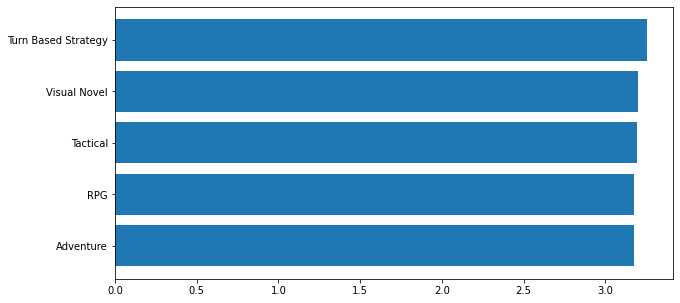

In [54]:
x = [key[0] for key in genre_ratings]
y = [values[1] for values in genre_ratings]
fig, ax = plt.subplots(figsize = (10,5))
ax.barh(x[-5:],y[-5:])

In [55]:
genre_ratings

[('MOBA', 2.8600000000000003),
 ('Quiz/Trivia', 2.931428571428571),
 ('Pinball', 2.983333333333333),
 ('Music', 2.9938775510204083),
 ('Point-and-Click', 3.0048),
 ('Arcade', 3.0073846153846158),
 ('Sport', 3.0090395480225984),
 ('Fighting', 3.0182432432432433),
 ('Strategy', 3.040631578947368),
 ('Simulator', 3.0522222222222224),
 ('Real Time Strategy', 3.0560606060606057),
 ('Racing', 3.070555555555555),
 ('Indie', 3.103516998827667),
 ('Puzzle', 3.1096938775510203),
 ('Platform', 3.1332920792079206),
 ('Brawler', 3.138871473354232),
 ('Card & Board Game', 3.156603773584906),
 ('Shooter', 3.1669767441860466),
 ('Adventure', 3.1757188498402558),
 ('RPG', 3.17683257918552),
 ('Tactical', 3.1958620689655173),
 ('Visual Novel', 3.1993197278911567),
 ('Turn Based Strategy', 3.2521739130434786)]

| Rank | Top Average Rating | Most Common |
|:---:|:---:|:---:|
| 1 | Turn Based Strategy | **Adventure** |
| 2 | Visual Novel | **RPG** |
| 3 | Tactical | Indie |
| 4 | **RPG** | Shooter |
| 5 | **Adventure** | Platform |

In [ ]:
# {'criterion': 'entropy',
#  'max_depth': None,
#  'max_features': None,
#  'min_samples_leaf': 0.1,
#  'min_samples_split': 0.7,
#  'n_estimators': 10,
#  'random_state': 10}

# forest_clf_bal = RandomForestClassifier()
# forest_clf_grid_search_bal = GridSearchCV(forest_clf_bal, param_grid_2, return_train_score= True, cv= 3, scoring= 'accuracy')
# forest_clf_grid_search_bal.fit(X_train_bal, y_train_bal)

# {'criterion': 'entropy',
#  'max_depth': 10,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 1,
#  'min_samples_split': 6,
#  'n_estimators': 20,
#  'random_state': 10}

# forest_clf_bal_2 = RandomForestClassifier()
# forest_clf_grid_search_bal_2 = GridSearchCV(forest_clf_bal, param_grid_2, return_train_score= True, cv= 3, scoring= 'accuracy')
# forest_clf_grid_search_bal_2.fit(X_train_bal, y_train_bal)

# forest_clf_bal = RandomForestClassifier()
# forest_clf_grid_search_bal = GridSearchCV(forest_clf_bal, param_grid_2, return_train_score= True, cv= 3, scoring= 'f1')
# forest_clf_grid_search_bal.fit(X_train_bal, y_train_bal)

# forest_clf_bal_2 = RandomForestClassifier()
# forest_clf_grid_search_bal_2 = GridSearchCV(forest_clf_bal_2, param_grid_2, return_train_score= True, cv= 3, scoring= 'f1')
# forest_clf_grid_search_bal_2.fit(X_train_2_bal, y_train_2_bal)